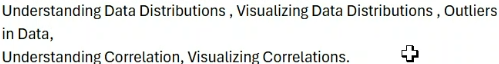

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

## Boxplots
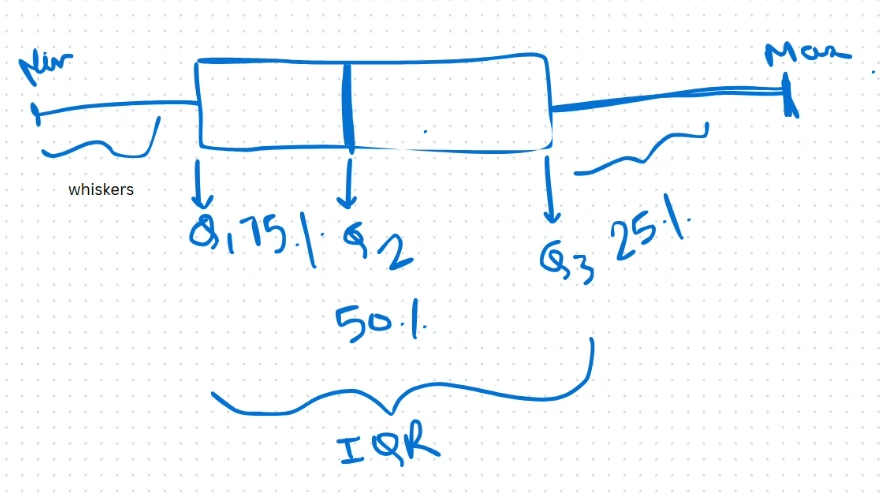

In [3]:
idf = sns.load_dataset('iris')
idf.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


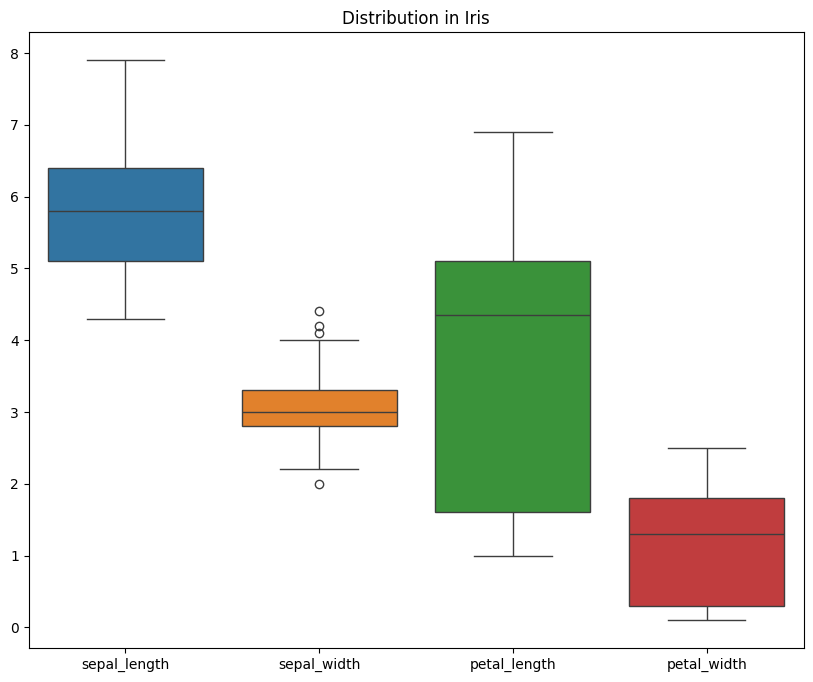

In [4]:
plt.figure(figsize=(10,8))
sns.boxplot(idf)
plt.title("Distribution in Iris")
plt.show()

In [5]:
data = pd.DataFrame({
    "Students":['Alice','Bob','Charlie','David','Fredd','Hari'],
    "heights":[167,168,197,170,172,175],
    "marks":[10,9,6,9,8,7]
})
data

,Students,heights,marks
0,Alice,167,10
1,Bob,168,9
2,Charlie,197,6
3,David,170,9
4,Fredd,172,8
5,Hari,175,7


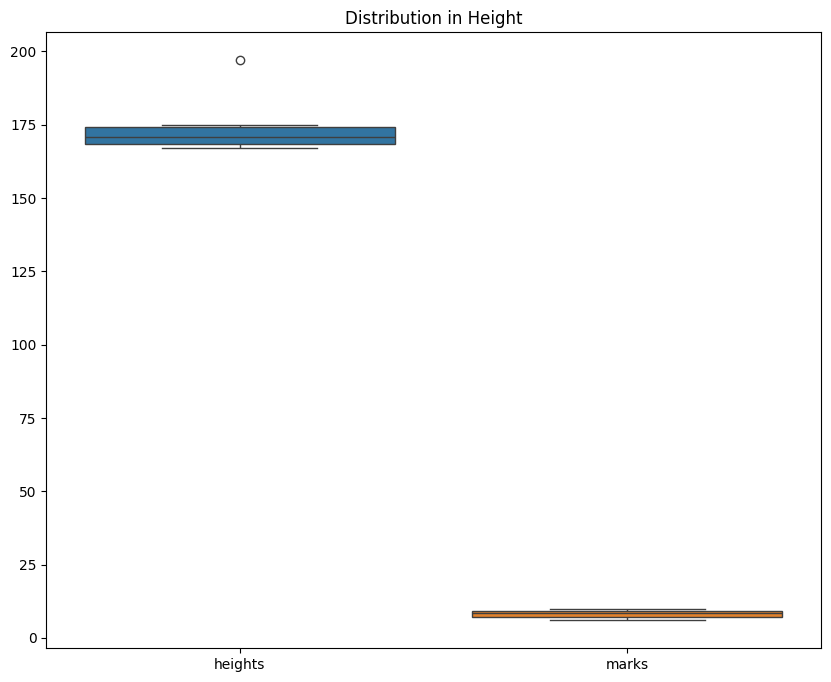

In [6]:
plt.figure(figsize=(10, 8))
sns.boxplot(data)
plt.title("Distribution in Height")
plt.show()

In [7]:
data['heights'].median(numeric_only=True)

171.0

In [8]:
data.loc[2,"heights"] = np.nan
data

,Students,heights,marks
0,Alice,167.0,10
1,Bob,168.0,9
2,Charlie,NaN,6
3,David,170.0,9
4,Fredd,172.0,8
5,Hari,175.0,7


In [9]:
imputer = KNNImputer(n_neighbors=2)
imputed_heights = imputer.fit_transform(data[['heights','marks']])
pd.DataFrame(imputed_heights)

,0,1
0,167.0,10.0
1,168.0,9.0
2,173.5,6.0
3,170.0,9.0
4,172.0,8.0
5,175.0,7.0


In [10]:
df = pd.read_csv('data/products_data.csv')
df

,Product_ID,Product_Name,Category,Price,Stock,Rating,Launch_Date
0,101,Smart TV,Electronics,500.0,25.0,4.5,2021-05-15
1,102,Laptop,Electronics,NaN,15.0,4.7,2021-03-10
2,103,Sofa,Furniture,300.0,30.0,NaN,2020-11-20
3,104,Coffee Maker,Kitchen,150.0,50.0,4.2,2021-01-25
4,105,Smart TV,Electronics,500.0,25.0,4.5,2021-05-15
5,106,Office Chair,Furniture,200.0,20.0,4.0,2022-02-05
6,107,Desk,Furniture,NaN,10.0,4.3,2019-06-30
7,108,Phone,Electronics,400.0,NaN,4.3,2022-03-12


In [11]:
df.describe()

,Product_ID,Price,Stock,Rating
count,8.00000,6.000000,7.000000,7.000000
mean,104.50000,341.666667,25.000000,4.357143
std,2.44949,149.721965,12.909944,0.229907
min,101.00000,150.000000,10.000000,4.000000
25%,102.75000,225.000000,17.500000,4.250000
50%,104.50000,350.000000,25.000000,4.300000
75%,106.25000,475.000000,27.500000,4.500000
max,108.00000,500.000000,50.000000,4.700000


In [12]:
imputer = KNNImputer(n_neighbors=3)
imputed_data = pd.DataFrame(
    imputer.fit_transform(df[["Product_ID", "Price", "Stock", "Rating"]]),
    columns=["Product_ID", "Price", "Stock", "Rating"]
)

In [13]:
imputed_data

,Product_ID,Price,Stock,Rating
0,101.0,500.000000,25.000000,4.500000
1,102.0,366.666667,15.000000,4.700000
2,103.0,300.000000,30.000000,4.333333
3,104.0,150.000000,50.000000,4.200000
4,105.0,500.000000,25.000000,4.500000
5,106.0,200.000000,20.000000,4.000000
6,107.0,366.666667,10.000000,4.300000
7,108.0,400.000000,16.666667,4.300000


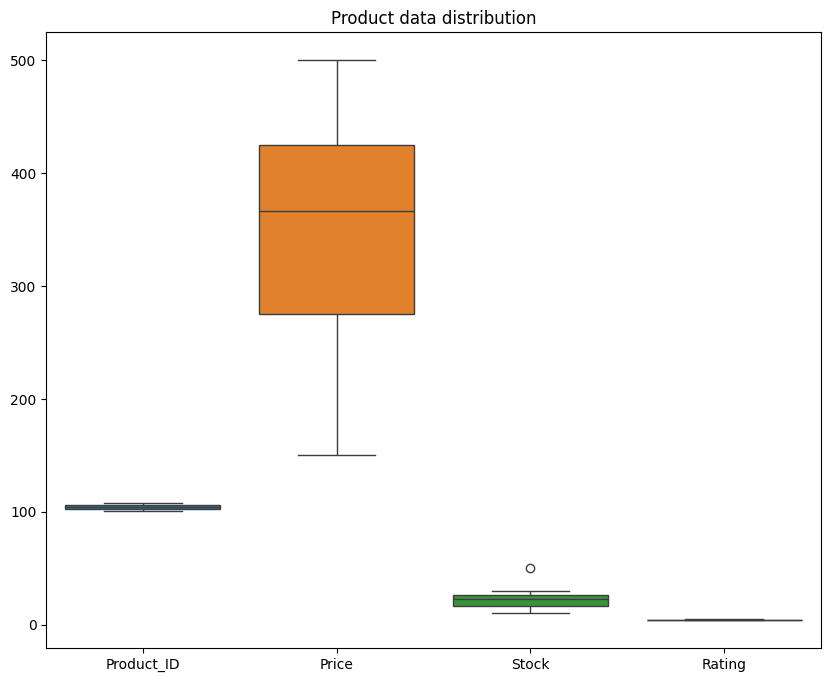

In [14]:
plt.figure(figsize=(10,8))
sns.boxplot(imputed_data)
plt.title("Product data distribution")
plt.show()

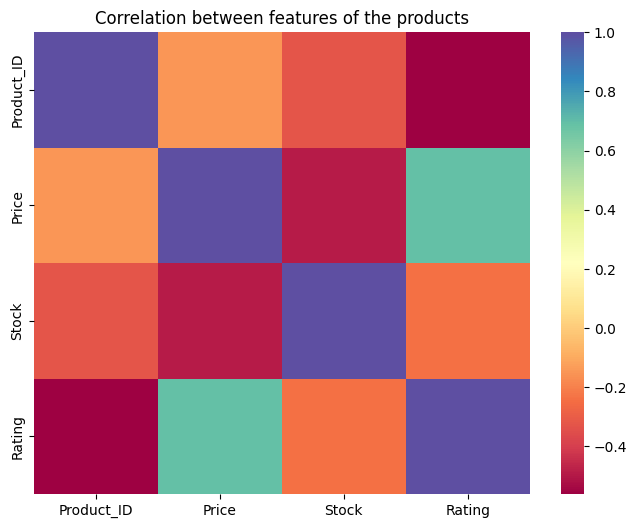

In [15]:
correlation = imputed_data.corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation,cmap='Spectral')
plt.title('Correlation between features of the products')
plt.show()

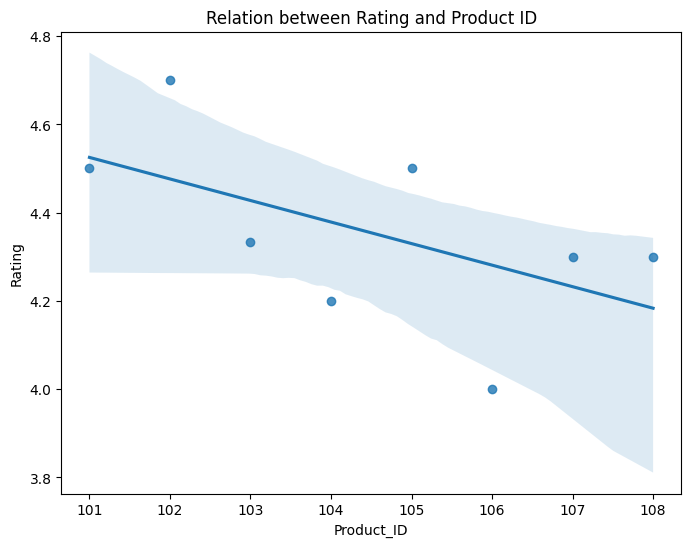

In [16]:
plt.figure(figsize=(8, 6))
sns.regplot(x=imputed_data['Product_ID'], y=imputed_data['Rating'])
plt.title("Relation between Rating and Product ID") # I think it migh not be as useful
plt.show()